In [1]:
import pandas as pd
dataframe = pd.read_csv('/kaggle/input/suicide-watch/Suicide_Detection.csv')
dataframe.head()

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [2]:
suicide = dataframe[dataframe['class']=='suicide']
non_suicide = dataframe[dataframe['class']== 'non-suicide']
suicide = suicide.head(50000)
non_suicide = non_suicide.head(50000)
dataframe = pd.concat([suicide,non_suicide])

In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99822
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  100000 non-null  int64 
 1   text        100000 non-null  object
 2   class       100000 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.1+ MB


In [4]:
dataframe.isnull().sum()

Unnamed: 0    0
text          0
class         0
dtype: int64

In [5]:
!pip install text_hammer 
import text_hammer as th

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.11.1
    Uninstalling beautifulsoup4-4.11.1:
      Successfully uninstalled beautifulsoup4-4.11.1


In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
nltk.download('stopwords')
nltk.download('punkt')
lists = stopwords.words('english')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
stopwords_list = ['i','I', 'am', 'is','are','this','that','then','those','have','has','it','can','could','the','had','was','were','been','them','what',
                  'yet', 'though', 'wherein', 'really', 'show', 'then', 'rather', 'same', 'con', 'call', 'is', 'twenty', 'side', 'go', 'namely',
                  'every', 'top', 'for', "'m", 'with', 'either', 'because', 'two', 'well', 'when', 'those', 'under', 'thin', 'amount', 'upon', 
                  'kg', 'the', "that'll", 'ca', 'even', 'very', 'into', 'by', '‘m', 'keep', 'although', 'done', 'bottom', 'detail', 'whatever', 
                  'from', 'formerly', 'these', 'enough', 'twelve', 'of', 'too', 'already', 'move', 'something', 'few', 'nothing', 'they', 'does',
                  'us', 'next', 'cry', 'but', 'eight', '‘s', 'however', 'four', "'ll", 'has', 'over', 'someone', 'afterwards', 'myself', 'have',
                  'would', 'anywhere', 'hereupon', 'using', 'everything', 'his', 'put', 'many', 'more', 'within', 'which', 'describe', 'thereby',
                  'nine', 'elsewhere', 'other', 'he', 'if', 'per', 'your', 's', 'be', 'than', 'now', 'sometime', 'herein', 'why', '‘d', 'whereas',
                  'behind', 'couldnt', 'de', "'re", 'least', 'latter', 'whereafter', 'part', 'after', 'front', 'interest', "you'd", 'whose', 'fire',
                  'sincere', 'down', 'to', 'whence', 'ours', "'s", 'all', 'noone', 'just', 'anyhow', 'ie', 'having', 'her', 'been', 'get', 'former', 
                  'throughout', 'above', '’d', 'cannot', 'almost', 'do', 'quite', 'seem', 'give', 'first', 'several', 'also', 'seems', 'became', '’m',
                  'sixty', 'anyway', '‘re', 'on', "you're", 'onto', 'co', 'third', 'fifty', 'had', 'seemed', '’s', 'yourselves', 'until', 'an', 'mine',
                  'across', 'sometimes', 'hereby', 'eleven', 'might', 'mostly', 'un', 'i', "'d", 'itself', 'most', 'beforehand', 'five', 'beyond',
                  'herself', "you've", 'unless', 'regarding', 'there', 'doesn', 'while', 'whoever', "should've", 'whereupon', 'name', 'further', 'o', 
                  'nobody', 'whereby', 'others', 'between', 'thus', 'any', "you'll", 'found', 'amongst', 'hers', 'wherever', 'ltd', 'still', 'somehow',
                  'often', 'km', 'becoming', 'six', 'can', "'ve", 'make', 'hence', 'around', 'both', 'our', 'along', 'latterly', 'please', 'via', 'whole',
                  'system', 've', 'd', 'you', 'themselves', 'here', 'used', 'in', 'forty', 'each', 'find', 'during', 'ain', 'ten', 'him', 'nevertheless',
                  "she's", 'me', 'them', 'ma', 'meanwhile', 'and', 'y', 'did', 'fifteen', 'serious', '’re', "it's", '’ll', 'that', 'alone', 'together', 
                  'where', 'hereafter', 'once', 'himself', 'could', 'made', 'among', 'whom', 'cant', 'doing', 'again', 'therefore', 'beside', 'hundred',
                  'three', 'etc', 'moreover', 'various', 'may', 'since', 'always', 'seeming', 'toward', 'are', 'll', 'everywhere', 'a', 'empty', 'yours',
                  'theirs', 'back', 'else', 'own', 'as', 'somewhere', 'bill', '‘ll', 're', 'through', 'last', 'nowhere', 'what', 'take', 'computer',
                  'yourself', 'eg', 'perhaps', 'thereupon', 'ourselves', 'against', 'inc', 'she', 'whether', 'their', 'm', 'such', 'thick', 'anything',
                  '’ve', 'neither', 'none', 'amoungst', 'one', 'were', 'thru', 'am', 'about', 'without', 'up', 'otherwise', 'except', 'who', 'due',
                  'thereafter', 'ever', 'much', 'out', 'how', 'whenever', 'before', 'it', 'some', 'being', 'mill', 'or', 'its', 'will', 'become',
                  'besides', 'say', 'therein', 'another', 'see', 'anyone', 'becomes', 'never', 'towards', 'everyone', 'below', 'full', 'my', 'only', 
                  'fill', 'we', 'should', 'thence', 'indeed', 'this', 'was', 'less', 'so', 't', 'at', 'must', 'whither', 'off','whose','whom','who','do','did','does'
]

In [8]:
%%time
def remove_stopwords(text):
  token = word_tokenize(text)
  token_without_stopwords = []
  for words in token:
    if words not in stopwords_list:
      token_without_stopwords.append(words)
  
  text = " ".join(token_without_stopwords)
  return text

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.58 µs


In [9]:
dataframe['text'] = dataframe['text'].apply(remove_stopwords)
dataframe.head()

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently left wife ...,suicide
3,8,need helpjust help im crying hard,suicide
4,9,"’ lostHello , Adam ( 16 ) ’ struggling years ’...",suicide
5,11,Honetly idkI dont know im . feel like . All fe...,suicide
6,12,[ Trigger warning ] Excuse self inflicted burn...,suicide


In [10]:
%%time
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()
def text_preprocessing(df,col_name):
    column = col_name
    df[column] = df[column].progress_apply(lambda x:str(x).lower())
    df[column] = df[column].progress_apply(lambda x: th.remove_emails(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_html_tags(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_special_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_accented_chars(x))
    return(df)

CPU times: user 445 µs, sys: 0 ns, total: 445 µs
Wall time: 450 µs


In [11]:
dataframe = text_preprocessing(dataframe, 'text')

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

In [12]:
X = dataframe['text']
y = dataframe['class']

In [13]:
from keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer(num_words= 10000,lower=True)
tokenizer.fit_on_texts(X)

In [14]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X = tokenizer.texts_to_sequences(X) # this converts texts into some numeric sequences 
X = pad_sequences(X,maxlen=200,padding='post') # this makes the length of all numeric sequences equal 
X[0]

array([ 395,  570, 2359,  104,  570,   27, 1157,  831, 1188,  256, 1536,
        353,   95,   90,  873, 2359,   42,  399,   95,  141,  541,  210,
        196,  116,    5,   75,    9, 3427,  871,   29,  438,   88,  336,
        432,  151,  764,   38,  570,    3,  240,   61, 1157,  254,   68,
       1945,  600,  101,   16,  114,    1,  255,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [15]:
X.shape

(100000, 200)

In [16]:
import gensim.downloader as api
glove_gensim  = api.load('glove-wiki-gigaword-100') #100 dimension

[==================================================] 100.0% 128.1/128.1MB downloaded


In [17]:
import numpy as np
from gensim.models import KeyedVectors
vector_size = 100
num_words = 10000
gensim_weight_matrix = np.zeros((num_words ,vector_size))
gensim_weight_matrix.shape
for word, index in tokenizer.word_index.items():
    if index < num_words: # since index starts with zero 
        if word in glove_gensim.index_to_key:
            gensim_weight_matrix[index] = glove_gensim[word]
        else:
            gensim_weight_matrix[index] = np.zeros(100)

In [18]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Embedding,Bidirectional
import tensorflow
from tensorflow.compat.v1.keras.layers import CuDNNGRU
from tensorflow.keras.layers import Dropout

In [19]:
from sklearn.model_selection import train_test_split
y=pd.get_dummies(dataframe['class'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [20]:
EMBEDDING_DIM = 100
model = Sequential()
model.add(Embedding(input_dim = num_words,
 output_dim = EMBEDDING_DIM,
 input_length= X.shape[1],
 weights = [gensim_weight_matrix],trainable = False))
model.add(Dropout(0.2))
model.add(CuDNNGRU(100,return_sequences=True))
model.add(Dropout(0.2))
model.add(CuDNNGRU(100,return_sequences=False))
model.add(Dense(2, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',metrics = 'accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 100)          1000000   
                                                                 
 dropout (Dropout)           (None, 200, 100)          0         
                                                                 
 cu_dnngru (CuDNNGRU)        (None, 200, 100)          60600     
                                                                 
 dropout_1 (Dropout)         (None, 200, 100)          0         
                                                                 
 cu_dnngru_1 (CuDNNGRU)      (None, 100)               60600     
                                                                 
 dense (Dense)               (None, 2)                 202       
                                                                 
Total params: 1,121,402
Trainable params: 121,402
Non-tr

In [21]:
#EarlyStopping and ModelCheckpoint
from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
mc = ModelCheckpoint('./model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

In [22]:
history_embedding = model.fit(X_train, y_train, 
                                epochs = 25, batch_size = 128, 
                                validation_data=(X_test, y_test),
                                verbose = 1, callbacks= [es, mc]  )

Epoch 1/25
547/547 [==============================] - ETA: 0s - loss: 0.5269 - accuracy: 0.6883
Epoch 1: val_accuracy improved from -inf to 0.88613, saving model to ./model.h5
547/547 [==============================] - 30s 43ms/step - loss: 0.5269 - accuracy: 0.6883 - val_loss: 0.2910 - val_accuracy: 0.8861
Epoch 2/25
547/547 [==============================] - ETA: 0s - loss: 0.2625 - accuracy: 0.8958
Epoch 2: val_accuracy improved from 0.88613 to 0.90870, saving model to ./model.h5
547/547 [==============================] - 25s 46ms/step - loss: 0.2625 - accuracy: 0.8958 - val_loss: 0.2342 - val_accuracy: 0.9087
Epoch 3/25
547/547 [==============================] - ETA: 0s - loss: 0.2266 - accuracy: 0.9105
Epoch 3: val_accuracy improved from 0.90870 to 0.91453, saving model to ./model.h5
547/547 [==============================] - 25s 46ms/step - loss: 0.2266 - accuracy: 0.9105 - val_loss: 0.2169 - val_accuracy: 0.9145
Epoch 4/25
547/547 [==============================] - ETA: 0s - los

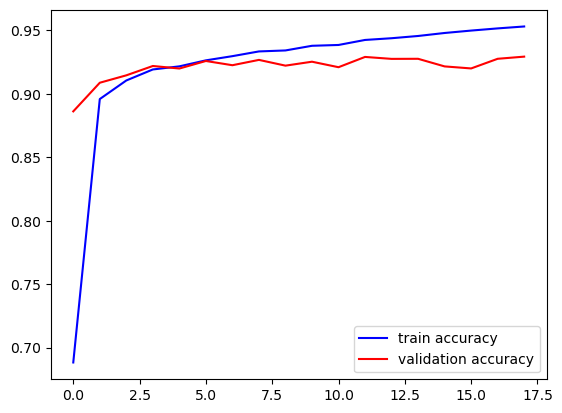

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(history_embedding.history['accuracy'],c='b',label='train accuracy')
plt.plot(history_embedding.history['val_accuracy'],c='r',label='validation accuracy')
plt.legend(loc='lower right')
plt.show()

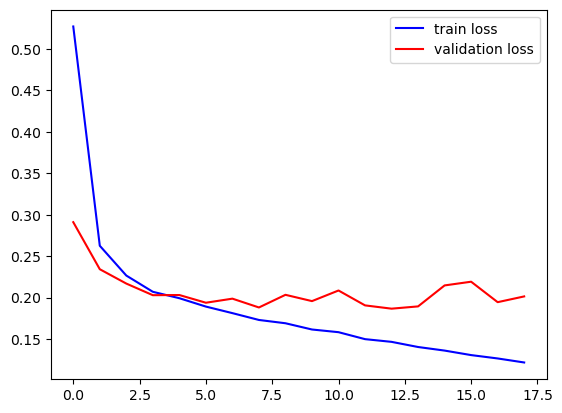

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(history_embedding.history['loss'],c='b',label='train loss')
plt.plot(history_embedding.history['val_loss'],c='r',label='validation loss')
plt.legend(loc='upper right')
plt.show()

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred=model.predict(X_test)
y_pred.shape
import numpy as np
y_pred=np.argmax(y_pred,axis=1)
y_pred
y_test = y_test.to_numpy()
y_test=np.argmax(y_test,axis = 1)
print(classification_report(y_test, y_pred))

938/938 [==============================] - 8s 9ms/step
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     14945
           1       0.92      0.94      0.93     15055

    accuracy                           0.93     30000
   macro avg       0.93      0.93      0.93     30000
weighted avg       0.93      0.93      0.93     30000

